# Red Profunda Perceptrón Multicapa
## Imports Necesarios

In [32]:
# Imports necesarios
import numpy as np
import pandas as pd
#import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
#from keras.optimizers import Adam
#from pyimagesearch import models

## Cargar archivo de Entradas

In [33]:
#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin.csv", index_col=0)
#veamos cuantas dimensiones y registros contiene
#data.shape

In [34]:
# Ver los 1ros registros
data.head()

,ws,wd,anno,mes,wp1
4,2.93,120.13,2009,7,0.035
5,2.96,115.79,2009,7,0.005
6,2.81,106.71,2009,7,0.000
7,2.73,95.39,2009,7,0.000
8,2.87,88.50,2009,7,0.010


## Separar Datos de Entrenamiento (Train) y Test

In [35]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:2]
y_train = dataset_train[:,4]


dataset_test = data_test.values
x_test = dataset_test[:,0:2]
y_test = dataset_test[:,4]

#dataX2 =  pd.DataFrame()
#dataX2["ws"] =data_train["ws"]
#dataX2["wd"] =data_train["wd"]
#dataX2["anno"] =data_train["anno"]
#dataX2["mes"] =data_train["mes"]

#x_train= np.array(dataX2,"float32")
#y_train = np.array(data_train['wp1'].values,"float32")

#y_train  

#print(y_train[0:1].shape) 

#x_train.shape

x_train
len(x_train)

65097

## Crear Modelo, Entrenarlo y Predecir

In [36]:
# Funcion para obtener score R2
from keras import backend as K
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [43]:
## cargamos las 4 combinaciones de las compuertas XOR
#training_data = x_train
 
# y estos son los resultados que se obtienen, en el mismo orden
#target_data = y_train


# import norm
#from keras.constraints import max_norm
# instantiate norm
#norm = max_norm(3.0)

#, kernel_constraint=max_norm(3), bias_constraint=max_norm(3))
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1, activation='linear'))
 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy', r2_keras])
 
hist=model.fit(x_train, y_train, epochs=20)
#validation_data=(x_test, y_test),

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

Epoch 1/20
65097/65097 [==============================] - 7s 112us/step - loss: 0.0384 - binary_accuracy: 0.0880 - r2_keras: 0.1042
Epoch 2/20
65097/65097 [==============================] - 6s 91us/step - loss: 0.0338 - binary_accuracy: 0.0883 - r2_keras: 0.2185
Epoch 3/20
65097/65097 [==============================] - 6s 92us/step - loss: 0.0331 - binary_accuracy: 0.0883 - r2_keras: 0.2306
Epoch 4/20
65097/65097 [==============================] - 7s 104us/step - loss: 0.0326 - binary_accuracy: 0.0882 - r2_keras: 0.2477
Epoch 5/20
65097/65097 [==============================] - 6s 98us/step - loss: 0.0324 - binary_accuracy: 0.0882 - r2_keras: 0.2520
Epoch 6/20
65097/65097 [==============================] - 7s 107us/step - loss: 0.0322 - binary_accuracy: 0.0883 - r2_keras: 0.2566
Epoch 7/20
65097/65097 [==============================] - 6s 96us/step - loss: 0.0319 - binary_accuracy: 0.0883 - r2_keras: 0.2635
Epoch 8/20
65097/65097 [==============================] - 6s 96us/step - loss: 0

## Obtener Metricas del Modelo

In [44]:
# evaluamos el modelo
scores = model.evaluate(x_train, y_train)

65097/65097 [==============================] - 2s 33us/step


In [45]:
#print("R2:",  r2_keras(y_train, y_pred_train) )
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], scores[2]*100))
#print (model.predict(x_train).round())


loss: 3.08%

binary_accuracy: 8.82%

r2_keras: 28.79%


In [46]:
from sklearn.metrics import r2_score
print('Coefficient of determination Train (R^2): %.2f' % r2_score(y_train, y_pred_train))

Coefficient of determination Train (R^2): 0.34


## Graficar Resultados

In [47]:
neuronas =100
pred_train = model.predict(x_train)
corr = np.corrcoef(y_train, y_pred_train[:, 0])

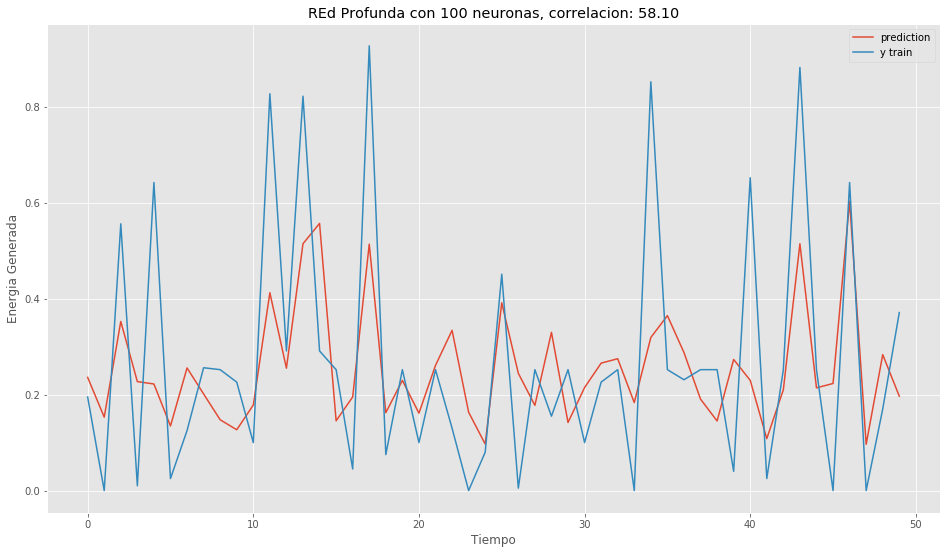

In [48]:
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]

plt.plot(pred_test_plot, label ="prediction")
plt.plot(y_test_plot, label ="y train")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("REd Profunda con %i neuronas, correlacion: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

In [22]:
print(hist.history.keys())

dict_keys(['loss', 'binary_accuracy', 'r2_keras'])


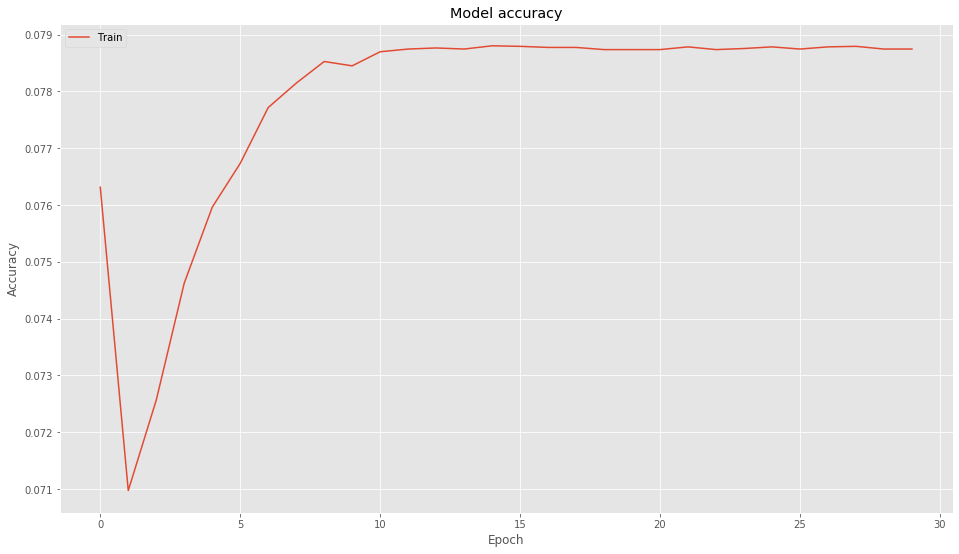

In [66]:
# Plot training & validation accuracy values
plt.plot(hist.history['binary_accuracy'])
#plt.plot(hist.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

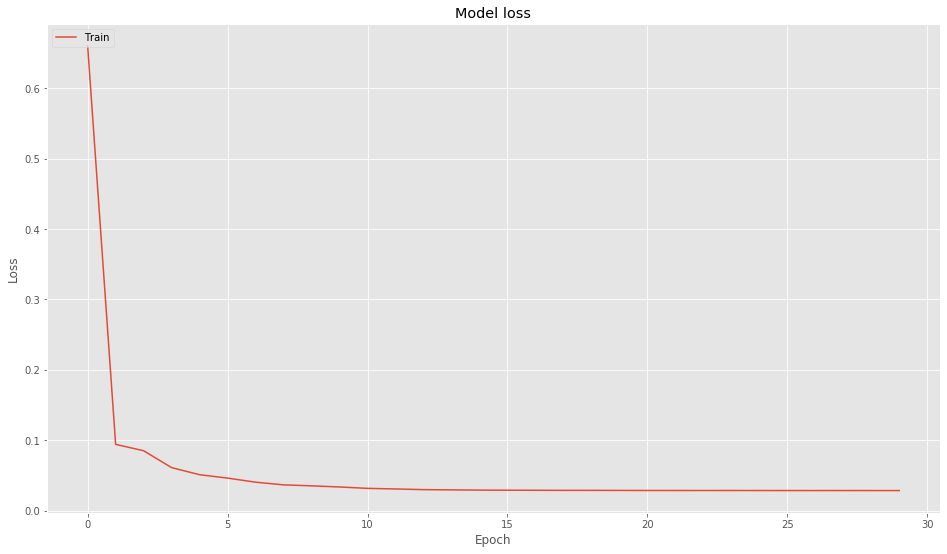

In [67]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

#y_12 = regr.predict([[12,70.4,2012,7]])
test= np.array([[3.66,106.24,2009,7]])
y_12 = model.predict(test)


print(y_12)

[[0.21484368]]


In [35]:

df_test = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/test_24.csv")
#veamos cuantas dimensiones y registros contiene

# Ver los 1ros registros
df_test.head()

,ws,wd,anno,mes
0,6.00,129.58,2009,7
1,5.95,129.18,2009,7
2,5.58,128.26,2009,7
3,5.02,126.75,2009,7
4,4.36,124.69,2009,7


In [36]:
df_test.describe()

,ws,wd,anno,mes
count,48.000000,48.000000,48.0,48.0
mean,5.201875,117.106667,2009.0,7.0
std,1.878959,9.265603,0.0,0.0
min,2.540000,100.850000,2009.0,7.0
25%,3.395000,110.390000,2009.0,7.0
50%,4.970000,117.195000,2009.0,7.0
75%,6.800000,123.850000,2009.0,7.0
max,8.700000,139.140000,2009.0,7.0


In [37]:
#x_test = df_test[:,1:5]
#y_train = dataset[:,5

In [38]:
df = df_test.values
x_test = df[:,0:4]

x_test

y_12 = model.predict(x_test)

print(y_12)

[[0.2876894 ]
 [0.28733653]
 [0.28382248]
 [0.278556  ]
 [0.27247322]
 [0.2669514 ]
 [0.26263934]
 [0.26079124]
 [0.26227742]
 [0.2674305 ]
 [0.27445564]
 [0.2807752 ]
 [0.28510275]
 [0.28837508]
 [0.2927746 ]
 [0.2991931 ]
 [0.306817  ]
 [0.31375518]
 [0.31832057]
 [0.31797013]
 [0.30955103]
 [0.29144642]
 [0.26939908]
 [0.25152948]
 [0.24679148]
 [0.25241008]
 [0.2605782 ]
 [0.265843  ]
 [0.26808086]
 [0.2676657 ]
 [0.26527187]
 [0.26369336]
 [0.26557082]
 [0.27277327]
 [0.28222504]
 [0.29117727]
 [0.29802597]
 [0.30386725]
 [0.308655  ]
 [0.31150702]
 [0.3131152 ]
 [0.3152927 ]
 [0.31865206]
 [0.31969678]
 [0.3134599 ]
 [0.29705384]
 [0.27641323]
 [0.2606102 ]]


### 

In [ ]:
## Gurdar regresión

In [49]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_deepNN.csv')
